In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel('EmployeeSampleData.xlsx')
print(df.info)

<bound method DataFrame.info of        EEID        Full Name                 Job Title  Department  \
0    E02387      Emily Davis                Sr. Manger          IT   
1    E04105    Theodore Dinh       Technical Architect          IT   
2    E02572     Luna Sanders                  Director     Finance   
3    E02832  Penelope Jordan  Computer Systems Manager          IT   
4    E01639        Austin Vo               Sr. Analyst     Finance   
..      ...              ...                       ...         ...   
995  E03094     Wesley Young               Sr. Analyst   Marketing   
996  E01909     Lillian Khan                   Analyst     Finance   
997  E04398      Oliver Yang                  Director   Marketing   
998  E02521      Lily Nguyen               Sr. Analyst     Finance   
999  E03545      Sofia Cheng            Vice President  Accounting   

              Business Unit  Gender  Ethnicity  Age  Hire Date  Annual Salary  \
0    Research & Development  Female      Black

1. PRINT YEAR WISE HIRING COUNT

In [ ]:
df['hire year'] = df['Hire Date'].apply(lambda x:x.year)
print(df[['hire year']].groupby('hire year')['hire year'].count().reset_index(name='Count'))

    hire year  Count
0        1992     11
1        1993      3
2        1994     13
3        1995      9
4        1996     10
5        1997     12
6        1998     16
7        1999     14
8        2000     14
9        2001     17
10       2002     23
11       2003     19
12       2004     29
13       2005     27
14       2006     30
15       2007     33
16       2008     25
17       2009     29
18       2010     42
19       2011     39
20       2012     37
21       2013     39
22       2014     52
23       2015     47
24       2016     52
25       2017     70
26       2018     68
27       2019     68
28       2020     66
29       2021     86


Plot showing hiring trend over 10 year period bins

<AxesSubplot:xlabel='hire year', ylabel='Count'>

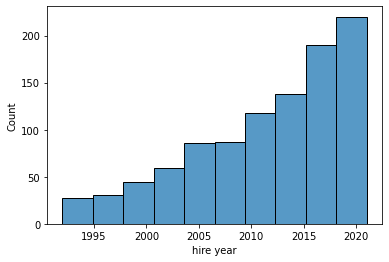

In [ ]:
sns.histplot(bins=10,data=df,x='hire year')

2. PRINT AND PLOT AGE WISE MAX SALARY TREND

In [ ]:
df2 = df[['Age','Annual Salary','EEID']].groupby('Age')['Annual Salary'].max().reset_index(name='Max Salary')
print(df2)

    Age  Max Salary
0    25      210708
1    26      256561
2    27      256420
3    28      250767
4    29      199783
5    30      255431
6    31      250953
7    32      203445
8    33      258426
9    34      220937
10   35      245482
11   36      253294
12   37      225558
13   38      255230
14   39      254057
15   40      242919
16   41      257194
17   42      186725
18   43      258498
19   44      207172
20   45      249801
21   46      173629
22   47      253249
23   48      258081
24   49      211291
25   50      247939
26   51      247874
27   52      236314
28   53      198473
29   54      247022
30   55      221465
31   56      228822
32   57      246589
33   58      199848
34   59      246619
35   60      234311
36   61      201464
37   62      234594
38   63      254289
39   64      252325
40   65      175837


<AxesSubplot:xlabel='Age', ylabel='Max Salary'>

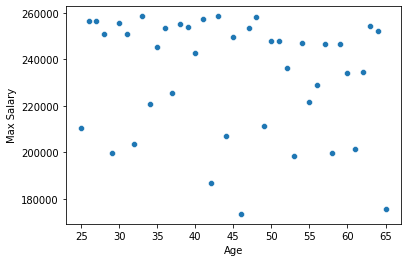

In [ ]:
sns.scatterplot(data=df2,x='Age',y='Max Salary')

3. PRINT/PLOT DEPARTMENT WISE RESOURCE/EMPLOYEE DEPLOYMENT COUNT 

In [ ]:
df3 = df[['Department','EEID']].groupby('Department')['EEID'].count().reset_index(name="Employee Count")
print(df3)

        Department  Employee Count
0       Accounting              96
1      Engineering             158
2          Finance             120
3  Human Resources             125
4               IT             241
5        Marketing             120
6            Sales             140


<AxesSubplot:xlabel='Department', ylabel='Employee Count'>

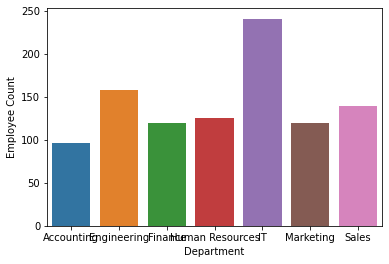

In [ ]:
sns.barplot(data=df3,x='Department',y='Employee Count')

4.PRINT THE REGRESSION PLOT OF THE SALARIES WITH YEAR

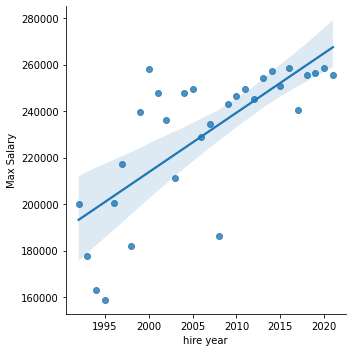

In [6]:
df['hire year'] = df['Hire Date'].apply(lambda x:x.year)
df4 = df[['Annual Salary','hire year']].groupby('hire year')['Annual Salary'].max().reset_index(name='Max Salary')
# print(df4)
sns.lmplot(data=df4,x='hire year',y='Max Salary')

5. PRINT/PLOT COUNTRY-WISE REPRESENTATION OF THE CANDIDATES

In [26]:
df5 = df[['Country','EEID']].groupby('Country')['EEID'].count().reset_index(name='Total')
df5['Total'].transform(lambda x:x/x.sum())

print(df5)

         Country  Total
0         Brazil    139
1          China    218
2  United States    643


<AxesSubplot:xlabel='Country', ylabel='Total'>

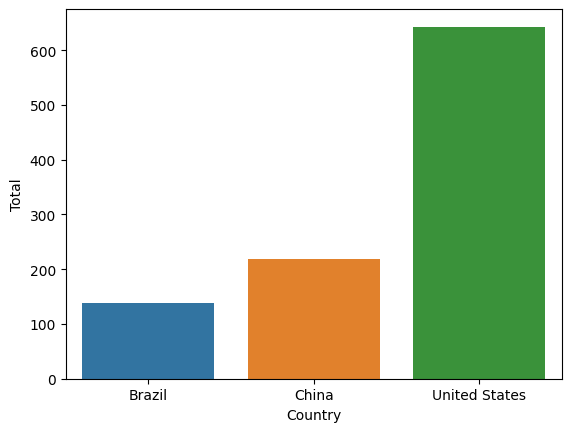

In [27]:
sns.barplot(data=df5,x='Country',y='Total')